In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils as u
from models import morales2009, pentzer2014pow, pentzer2022
from steps import preprocess
from visualization import papermode

papermode(plt, size=18)


In [2]:
abbr = "P05"
preprocess(abbr, verbose=False)
m2009_df = morales2009.morales2009(abbr, verbose=False)
p2014_df = pentzer2014pow.pentzer2014pow(abbr, verbose=False)
p2022_df = pentzer2022.pentzer2022(abbr, verbose=False)
figdir = u.get_figdir("thesis", subdir="modeling/hill")

P05: 100%|██████████| 37/37 [00:00<00:00, 8000.27it/s]


# Speed

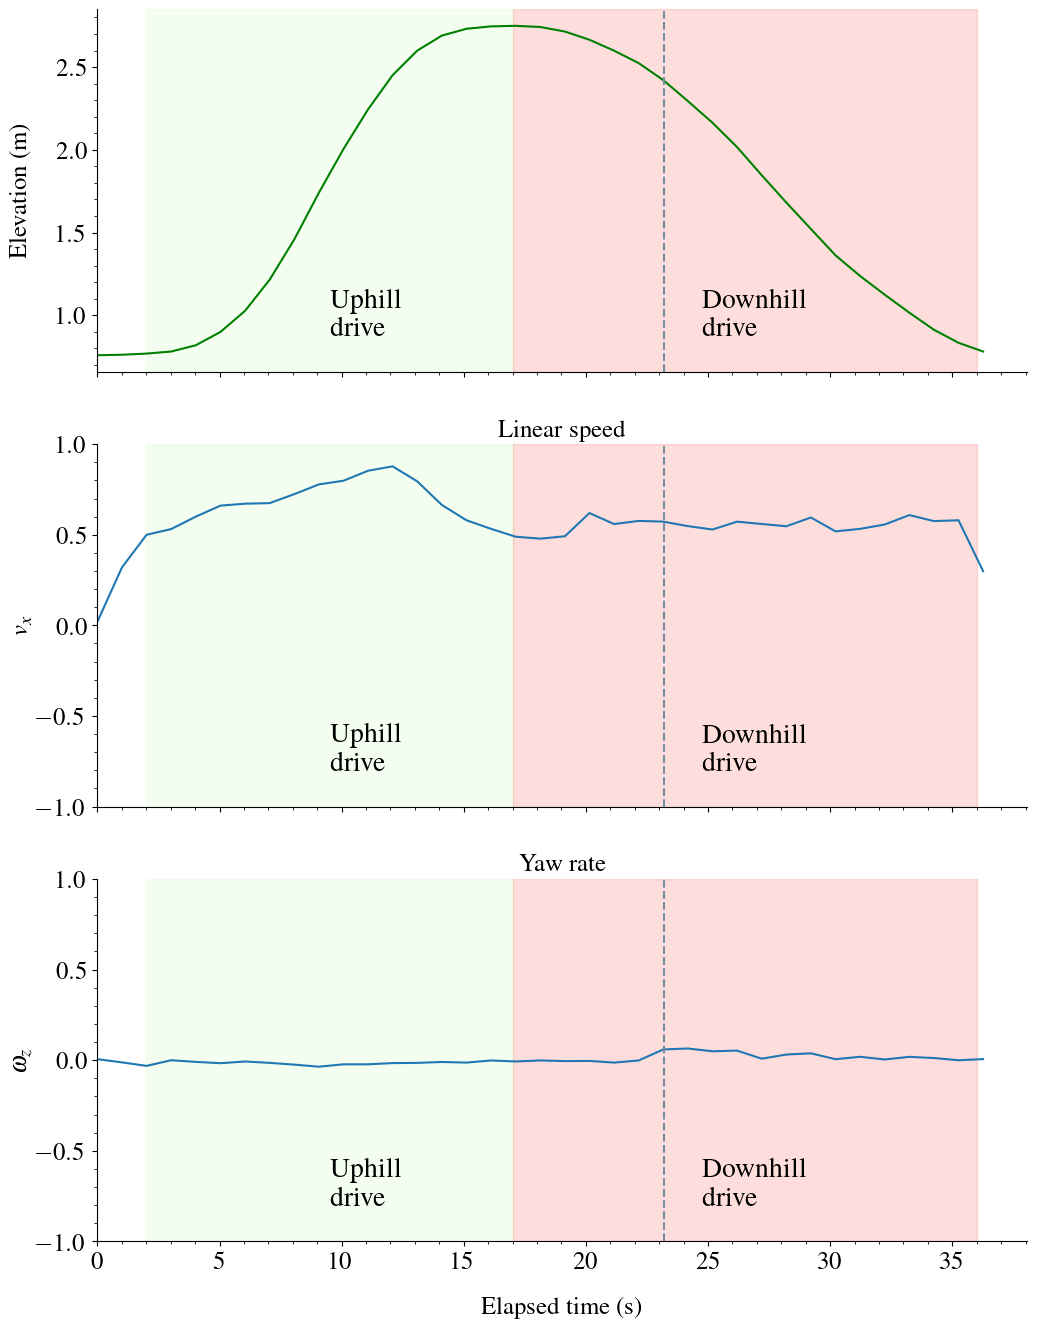

In [7]:
fig, axs = plt.subplots(figsize=(12, 16), nrows=3, sharex=True)

axs[0].plot(m2009_df.time_rel, m2009_df.pz, "g")
axs[0].set_ylabel("Elevation (m)")
axs[0].yaxis.set_label_coords(-0.07, 0.5)

axs[1].plot(m2009_df.time_rel, m2009_df.vx)
axs[1].set_ylabel("$v_x$")
axs[1].yaxis.set_label_coords(-0.07, 0.5)
axs[1].set_ylim(bottom=-1, top=1)
axs[1].set_title("Linear speed")

axs[2].plot(p2014_df.time_rel, p2014_df.wz)
axs[2].set_ylabel("${\omega}_{z}$")
axs[2].yaxis.set_label_coords(-0.07, 0.5)
axs[2].set_ylim(bottom=-1, top=1)
axs[2].set_title("Yaw rate")

axs[2].set_xlabel("Elapsed time (s)")
axs[2].xaxis.set_label_coords(0.5, -0.15)
axs[2].set_xlim(left=0)

for ax in axs:
    ax.spines[["right", "top"]].set_visible(False)
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

    ax.axvline(x=23.2, color="xkcd:blue/grey", linestyle="--")

    ax.axvspan(2,17, color="xkcd:pale green", alpha=0.2)
    ax.axvspan(17,36, color="xkcd:coral", alpha=0.2)
    ax.annotate("Uphill\ndrive", xy=(0.25,0.1), xycoords='axes fraction', fontsize=20)
    ax.annotate("Downhill\ndrive", xy=(0.65,0.1), xycoords='axes fraction', fontsize=20)


# $\mu$

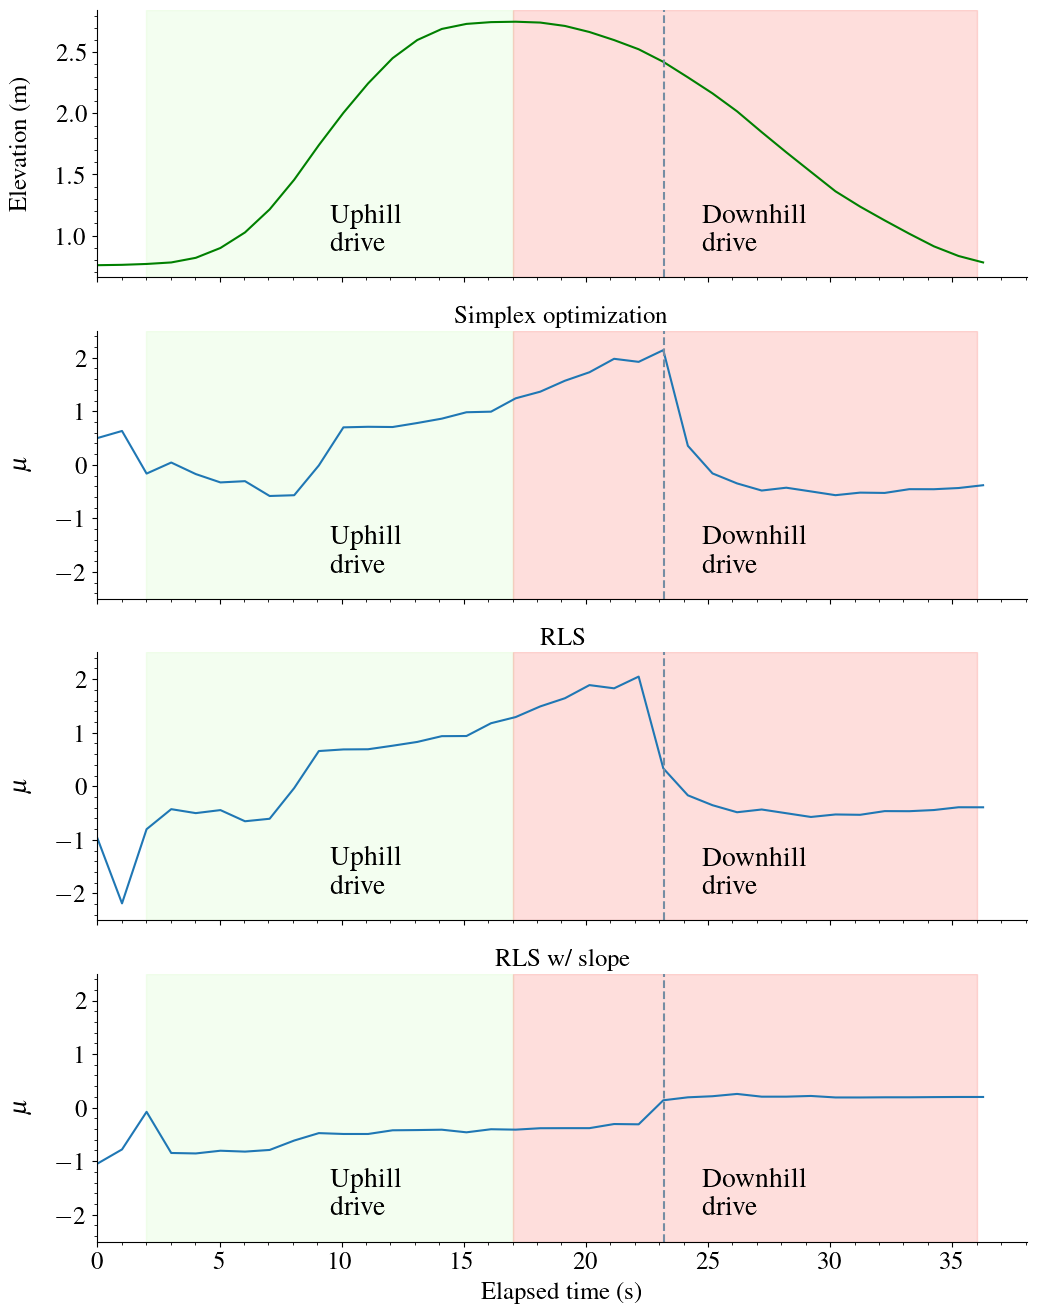

In [3]:
fig, axs = plt.subplots(figsize=(12, 16), nrows=4, sharex=True)

axs[0].plot(m2009_df.time_rel, m2009_df.pz, "g")
axs[0].set_ylabel("Elevation (m)")
axs[0].yaxis.set_label_coords(-0.07, 0.5)

axs[1].plot(m2009_df.time_rel, m2009_df.m_sym)
axs[1].set_ylabel("$\mu$")
axs[1].yaxis.set_label_coords(-0.07, 0.5)
axs[1].set_ylim(bottom=-2.5, top=2.5)
axs[1].set_title("Simplex optimization")

axs[2].plot(p2014_df.time_rel, p2014_df.m_sym)
axs[2].set_ylabel("$\mu$")
axs[2].yaxis.set_label_coords(-0.07, 0.5)
axs[2].set_ylim(bottom=-2.5, top=2.5)
axs[2].set_title("RLS")

axs[3].plot(p2022_df.time_rel, p2022_df.m_sym)
axs[3].set_ylabel("$\mu$")
axs[3].yaxis.set_label_coords(-0.07, 0.5)
axs[3].set_ylim(bottom=-2.5, top=2.5)
axs[3].set_title("RLS w/ slope")

axs[3].set_xlabel("Elapsed time (s)")
axs[3].xaxis.set_label_coords(0.5, -0.15)
axs[3].set_xlim(left=0)

for ax in axs:
    ax.spines[["right", "top"]].set_visible(False)
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

    ax.axvline(x=23.2, color="xkcd:blue/grey", linestyle="--")

    ax.axvspan(2,17, color="xkcd:pale green", alpha=0.2)
    ax.axvspan(17,36, color="xkcd:coral", alpha=0.2)
    ax.annotate("Uphill\ndrive", xy=(0.25,0.1), xycoords='axes fraction', fontsize=20)
    ax.annotate("Downhill\ndrive", xy=(0.65,0.1), xycoords='axes fraction', fontsize=20)

for ext in u.EXTS:
    fig.savefig(figdir / f"warthog-hill.{ext}", bbox_inches="tight")


# $K$

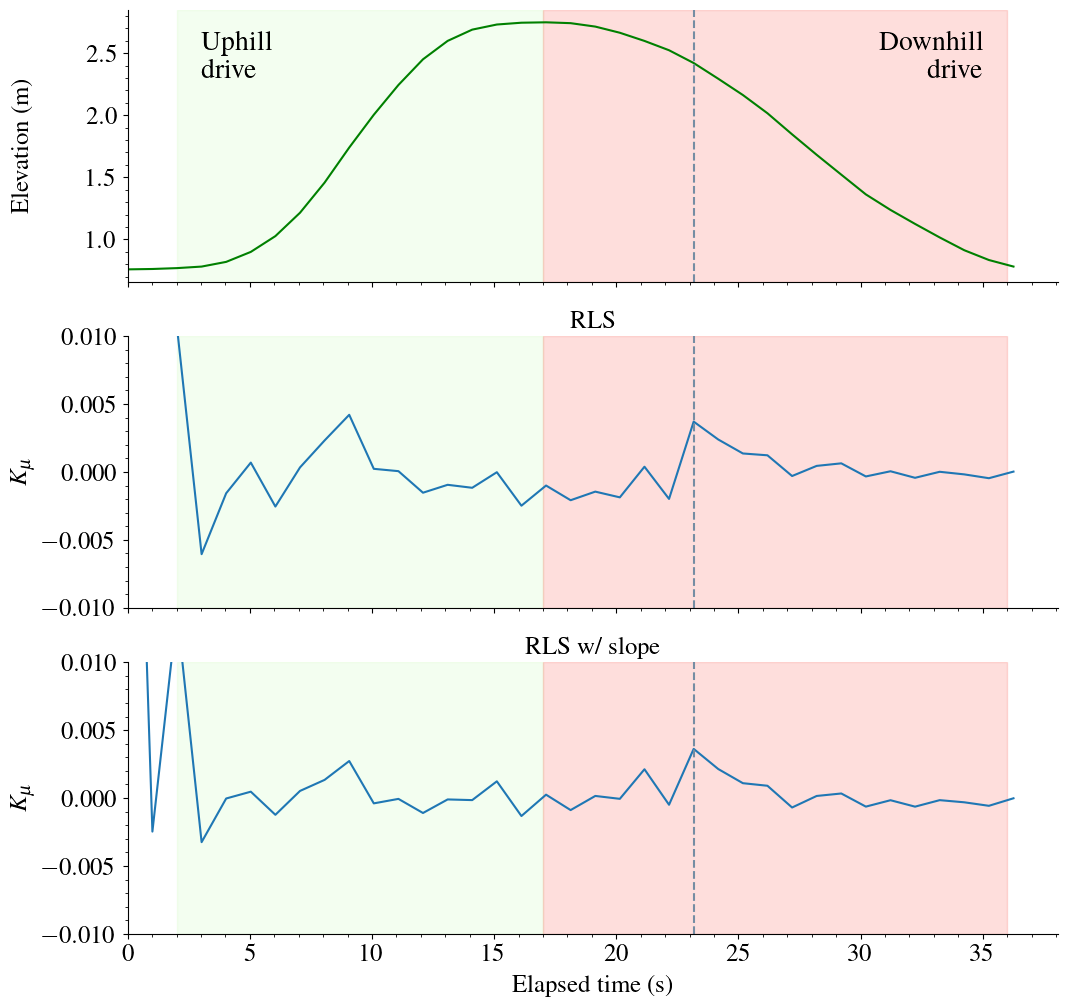

In [4]:
fig, axs = plt.subplots(figsize=(12, 12), nrows=3, sharex=True)

axs[0].plot(m2009_df.time_rel, m2009_df.pz, "g")
axs[0].set_ylabel("Elevation (m)")
axs[0].yaxis.set_label_coords(-0.1, 0.5)

axs[1].plot(p2014_df.time_rel, p2014_df.Km_sym)
axs[1].set_ylabel("$K_{\mu}$")
axs[1].yaxis.set_label_coords(-0.1, 0.5)
axs[1].set_ylim(bottom=-0.01, top=0.01)
axs[1].set_title("RLS")

axs[2].plot(p2022_df.time_rel, p2022_df.Km_sym)
axs[2].set_ylabel("$K_{\mu}$")
axs[2].yaxis.set_label_coords(-0.1, 0.5)
axs[2].set_ylim(bottom=-0.01, top=0.01)
axs[2].set_title("RLS w/ slope")

axs[2].set_xlabel("Elapsed time (s)")
axs[2].xaxis.set_label_coords(0.5, -0.15)
axs[2].set_xlim(left=0)

for idx, ax in enumerate(axs):
    ax.spines[["right", "top"]].set_visible(False)
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

    ax.axvspan(2,17, color="xkcd:pale green", alpha=0.2)
    ax.axvspan(17,36, color="xkcd:coral", alpha=0.2)

    ax.axvline(x=23.2, color="xkcd:blue/grey", linestyle="--")

    if idx != 0:
        ax.annotate("Uphill\ndrive", xy=(3,0.04), fontsize=20)
        ax.annotate("Downhill\ndrive", xy=(35,0.04), ha="right", fontsize=20)
    else:
        ax.annotate("Uphill\ndrive", xy=(3,2.3), fontsize=20)
        ax.annotate("Downhill\ndrive", xy=(35,2.3), ha="right", fontsize=20)


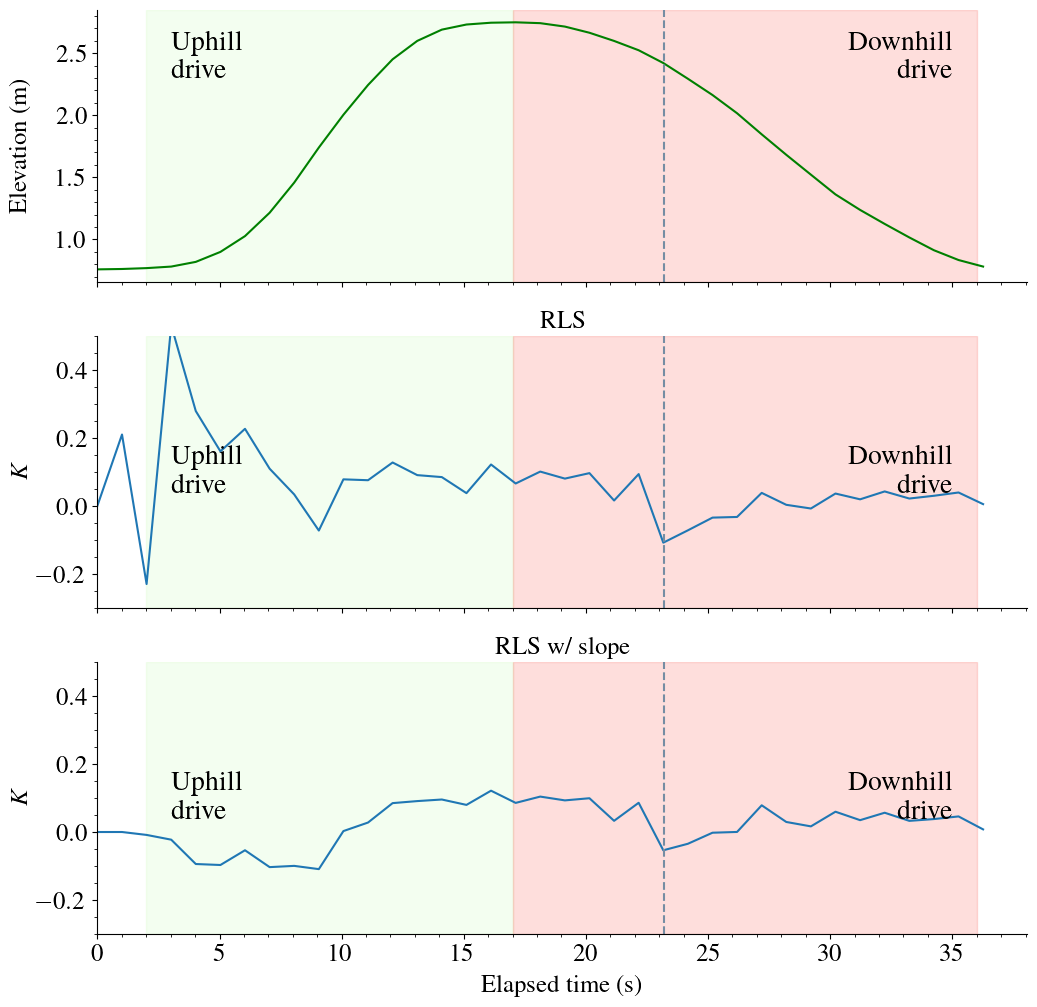

In [5]:
fig, axs = plt.subplots(figsize=(12, 12), nrows=3, sharex=True)

axs[0].plot(m2009_df.time_rel, m2009_df.pz, "g")
axs[0].set_ylabel("Elevation (m)")
axs[0].yaxis.set_label_coords(-0.07, 0.5)

axs[1].plot(p2014_df.time_rel, p2014_df.KG_sym)
axs[1].set_ylabel("$K$")
axs[1].yaxis.set_label_coords(-0.07, 0.5)
axs[1].set_ylim(bottom=-0.3, top=0.5)
axs[1].set_title("RLS")

axs[2].plot(p2022_df.time_rel, p2022_df.KG_sym)
axs[2].set_ylabel("$K$")
axs[2].yaxis.set_label_coords(-0.07, 0.5)
axs[2].set_ylim(bottom=-0.3, top=0.5)
axs[2].set_title("RLS w/ slope")

axs[2].set_xlabel("Elapsed time (s)")
axs[2].xaxis.set_label_coords(0.5, -0.15)
axs[2].set_xlim(left=0)

for idx, ax in enumerate(axs):
    ax.spines[["right", "top"]].set_visible(False)
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

    ax.axvspan(2,17, color="xkcd:pale green", alpha=0.2)
    ax.axvspan(17,36, color="xkcd:coral", alpha=0.2)

    ax.axvline(x=23.2, color="xkcd:blue/grey", linestyle="--")

    if idx != 0:
        ax.annotate("Uphill\ndrive", xy=(3,0.04), fontsize=20)
        ax.annotate("Downhill\ndrive", xy=(35,0.04), ha="right", fontsize=20)
    else:
        ax.annotate("Uphill\ndrive", xy=(3,2.3), fontsize=20)
        ax.annotate("Downhill\ndrive", xy=(35,2.3), ha="right", fontsize=20)
